# Galaxy Growth via Mergers and Cooling
This notebook uses a realistic forward-in-time merger tree. Each halo has **at most one descendant**, and **merging is possible**.

You will:
- Load the merger tree data
- Compute virial temperatures and cooling times
- Propagate galaxy growth forward using mergers
- Accumulate stellar mass from cooling and merging
- Incorporate feedback

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# Load the merger tree
df = pd.read_csv('large_merger_tree.csv')

df.head()

,halo_id,snapshot,z,mass,descendant_id
0,1,6,1.2,9.692735e+10,NaN
1,2,6,1.2,1.518333e+11,NaN
2,3,6,1.2,1.018693e+11,NaN
3,4,6,1.2,8.161232e+10,NaN
4,5,6,1.2,1.303969e+11,NaN


## Cooling Rate
We'll use a simplified, piecewise function based on gas temperature and metallicity.

In [4]:
def cooling_rate(T, Z=0.1):
    if T < 1e5:
        return 1e-24
    elif T < 1e6:
        return 1e-23 * Z
    else:
        return 1e-22 * Z

## Virial radius
Calculate the virial radius of each halo,
$$R_{\text{vir}} = \left( \frac{3 M_{\text{halo}}}{4 \pi \Delta_c \rho_c} \right)^{1/3}.$$
Use $\Delta_c=200$.

In [ ]:
# Calculate the virial radius of each halo


## Virial temperature

Calculate the virial temperature of each halo. This is the temperature for an ideal gas once virialized, and given by
$$T_{\text{vir}} = \frac{0.59 m_p G M_{\text{halo}}}{2 k_B R_{\text{vir}}}$$

In [ ]:
# Calculate the virial temperature of each halo


## Amount of hot gas
We assume that $\Omega_b/\Omega_m$ is the fraction of hot gas to dark matter in the halo.

In [ ]:
# Calculate amount of hot gas


## Cooling time
The time for hot gas to cool down is 
$$ t_{\text{cool}} = \frac{3 k_B T}{n \Lambda(T, Z)} $$
where $n$ is the number density of gas particles, which we can approximate by $\rho/m_p$

In [ ]:
# Calculate cooling time


## Amount of cold gas
The amount of cold gas is given by the amount of hot gas that had time to cool down in the 1Gyr between snapshots.

In [ ]:
# Function for cold gas
# Cold gas reservoir per snapshot (integrated over 1 Gyr timestep max)


## Star formation rate and amount of stellar mass formed in one snapshot
We assume the Kennicutt-Schmidt law for star formation which says that
$$\dot{\Sigma}\star = A \cdot \left( \frac{\Sigma{\text{gas}}}{1 \, M_\odot \, \text{pc}^{-2}} \right)^n$$

Where:
	•	$\dot{\Sigma}\star$: Star formation rate surface density (in $M\odot \, \text{yr}^{-1} \, \text{kpc}^{-2})$
	•	$\Sigma_{\text{gas}}$: Cold gas surface density (in $M_\odot \, \text{pc}^{-2}$)
	•	$A \approx 2.5 \times 10^{-4}$
	•	$n \approx 1.4$

In [ ]:

disk_radius_kpc = 10  # Assume all galaxies have 10 kpc disk radius
disk_area_pc2 = np.pi * (disk_radius_kpc * 1e3)**2  # pc^2

# Calculate Sigma_gas, Sigma_SFR and SFT



In [ ]:

# New stars formed over 1 Gyr snapshot


In [ ]:
# For each halo, calculate its stellar mass by adding the newly formed stars in each of its parents


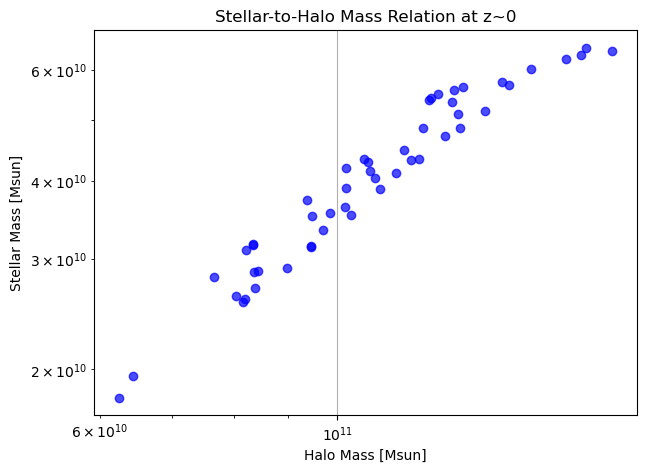

In [ ]:
# Plot the stellar mass - halo mass relation for each snapshot
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Halo Mass [Msun]')
plt.ylabel('Stellar Mass [Msun]')
plt.grid(True)
plt.show()

## SN and AGN feedback

Incorporate supernova and AGN feedback, by subtracting from the cold gas before star formation. We use
- AGN: if halo mass > 1e12 Msun, reduce cooling rate by 80%
- SN: if halo mass < 1e11 Msun, remove 50% of cold gas

In [ ]:
# Apply AGN feedback to cooling rate

# Recompute cold gas after feedback

# Update gas surface density and SFR

# Star formation with feedback


In [ ]:
# Propagate cumulative stellar mass with feedback


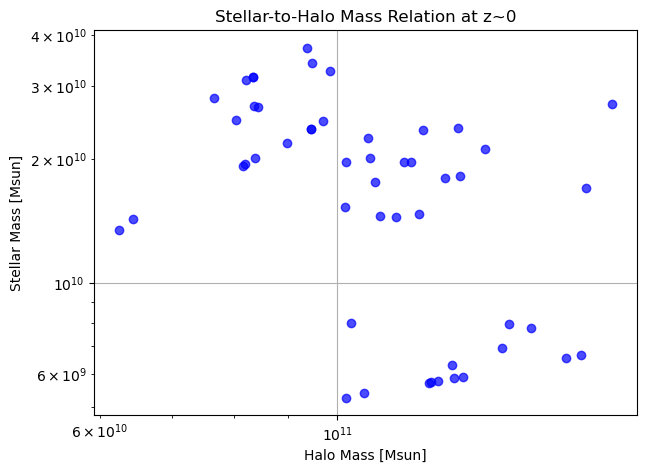

In [ ]:
# Plot stellar-to-halo mass relation
plt.figure(figsize=(7,5))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Halo Mass [Msun]')
plt.ylabel('Stellar Mass [Msun]')
plt.grid(True)
plt.show()